In [30]:
import os
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
import seaborn as sns

In [31]:
num_cams = 18
sampling_methods = ['last', 'ed', 'sw-o']

<font size = "6"> Accuracy </font>

In [32]:
log_path = '/home/tung/carlasim/data_archived/extracted_tracks_600_30/resnet/test_logs'
fig_path = '/home/tung/carlasim/trajectory_analysis_archived/figs'

task = 'nextcam'

data = {method: [] for method in sampling_methods}

for method in sampling_methods:
    for cam_num in range(num_cams):
        log_file = '{}_{}_{}_accuracy.txt'.format(task, method, cam_num)
        log_file_path = os.path.join(log_path, log_file)
        with open(log_file_path, 'r') as log_file:
            acc = log_file.read()
            data[method].append(acc)
            log_file.close()

data = pd.DataFrame.from_dict(
    data = data,
    dtype = float,
)
data = data.reset_index(drop = False)


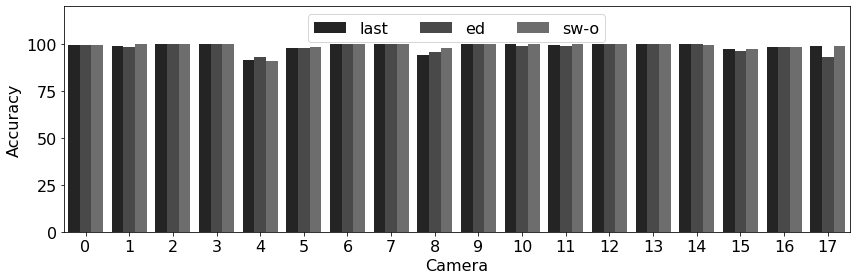

In [33]:
fig, axes = plt.subplots(figsize = (12, 4))
tidy = data.melt(id_vars = 'index')
color_palette = sns.color_palette('gray')
sns.barplot(x='index', y='value', hue='variable', data=tidy, ax=axes, palette = color_palette)
plt.xlabel(xlabel = 'Camera', size = 16)
plt.ylabel(ylabel = 'Accuracy', size = 16)
plt.legend(loc = 'upper center', ncol = len(sampling_methods), prop = {'size': 16})
plt.yticks([0, 0.25, 0.5, 0.75, 1], [0, 25, 50, 75, 100], fontsize = 16)
plt.xticks(fontsize = 16)
plt.ylim(0, 1.2)
plt.tight_layout()
plt.savefig(os.path.join(fig_path, 'accuracy.pdf'), dpi = 1500)

<font size = "6"> Transition time </font>

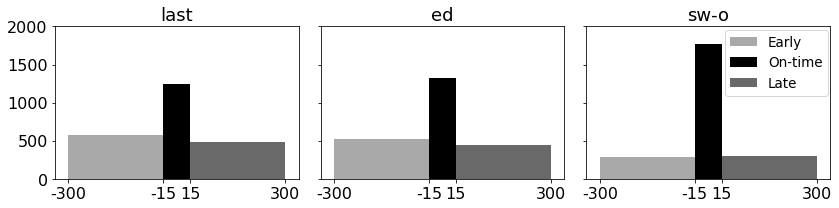

In [37]:
def switch(df, idx1, idx2):
    df = df.copy()
    temp = df.iloc[idx1]
    df.iloc[idx1] = df.iloc[idx2]
    df.iloc[idx2] = temp
    return df


log_path = '/home/tung/carlasim/data_archived/extracted_tracks_300_30_bb_15_60/resnet/test_logs'

task = 'transtime'

data = {method: [] for method in sampling_methods}

fig, axes = plt.subplots(figsize = (12, 3), nrows = 1, ncols = 3, sharey = True)
color_palette = sns.color_palette('gray')
for idx, method in enumerate(sampling_methods):
    for cam_num in range(num_cams):
        try:
            log_file = '{}_{}_{}_frame_loss.csv'.format(task, method, cam_num)
            log_file_path = os.path.join(log_path, log_file)
            df = pd.read_csv(log_file_path)
            data[method].extend(df['loss'].to_list())
        except:
            pass
    data[method] = pd.DataFrame.from_dict(
            data = data[method],
            dtype = int,
        )
    data[method].columns = ['loss']
    data[method] = data[method]['loss'].value_counts(bins = [-300, -15, 15, 300])
    data[method] = data[method].rename_axis('loss').reset_index(name = 'count')

    if method == 'sw-o':
        data[method]['count'] = data[method]['count'] // 30
        data[method] = switch(data[method], 0, 2)
        data[method] = switch(data[method], 1, 2)
    else:
        data[method] = switch(data[method], 0, 1)
    data[method]['loss'] = ['Early', 'On-time', 'Late']
    #print(data[method])
    #data[method] = data[method].pivot(index = 'dummy', columns = 'loss', values = 'count').reset_index(drop = True)
    # print(list(data[method]['count']))
    
    
    # #axes[idx].set_xlim(-250, 250)
    
    # sns.barplot(data = data[method], x = 'loss', y = 'count', ax = axes[idx], palette = color_palette, hue = 'loss')
    # widthbars = [1.5, 0.5, 2.5]
    # for bar, newwidth in zip(axes[idx].patches, widthbars):
    #     x = bar.get_x()
    #     width = bar.get_width()
    #     centre = x + width/2.
    #     bar.set_x(centre - newwidth/2.)
    #     bar.set_width(newwidth)
    #     print(newwidth)
    # break

    axes[idx].bar(x = [-0.5], height = data[method]['count'][0], color = ['darkgray'], align = 'edge', width = -3.5)
    axes[idx].bar(x = [-0.5], height = data[method]['count'][1], color = ['black'], align = 'edge', width = 1)
    axes[idx].bar(x = [0.5], height = data[method]['count'][2], color = ['dimgray'], align = 'edge', width = 3.5)
    axes[idx].set_title(method, size = 18)
    #axes[idx].legend(['Early', 'Late'])
    #axes[idx].bar(x = [0], height = data[method]['count'][1], color = 'black', width = 1, label = 'On-time')
    #axes[idx].legend(['Early', 'On-time', 'Late'])
    # axes[idx].tick_params(
    #     axis='x',          # changes apply to the x-axis
    #     which='both',      # both major and minor ticks are affected
    #     bottom=False,      # ticks along the bottom edge are off
    #     top=False,         # ticks along the top edge are off
    #     labelbottom=False # labels along the bottom edge are off
    # )
    axes[idx].set_xticks(ticks = [-4, -0.5, 0.49, 4])
    axes[idx].set_xticklabels(labels = [-300, -15, 15, 300])
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('')
    axes[idx].set_ylim(0, 2000)
    axes[idx].set_xlim(-4.5, 4.5)
    axes[idx].tick_params(axis='both', which='major', labelsize=16)
    
plt.legend(['Early', 'On-time', 'Late'], prop = {'size': 13.5}, bbox_to_anchor = (0.54, 0.5))
plt.tight_layout()
plt.savefig(os.path.join(fig_path, 'time-diff.pdf'), dpi = 1500)


<font size = "6"> Precision </font>

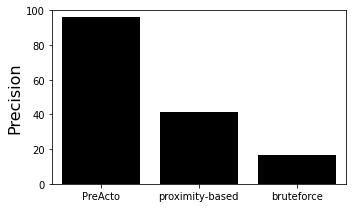

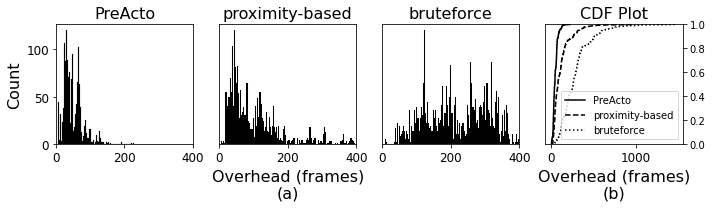

In [51]:
log_path = '/home/tung/carlasim/data_archived/extracted_tracks_300_30_bb_15_60/scenerio_sim_log'

methods = ['proposed', 'knei', 'bruteforce']
names = ['PreActo', 'proximity-based', 'bruteforce']

columns = ['total_track_frames','num_seen_frames_gt','num_processed_frames','num_seen_frames']

data = {}
for method in methods:
    data[method] = {column: [] for column in columns}

precision = {'method': [], 'precision': []}
overhead = {}
for idx, method in enumerate(methods):
    log_file = '{}.csv'.format(method)
    log_file_path = os.path.join(log_path, log_file)
    df = pd.read_csv(log_file_path)
    
    for column in columns:
        data[method][column].extend(list(df[column]))
    
    precision['method'].append(method)
    precision['precision'].append(sum(data[method]['num_seen_frames']) / sum(data[method]['num_processed_frames']) * 100)
    overhead[method] = list(df['num_processed_frames'] // num_cams) 

precision = pd.DataFrame(
    precision
)

fig = plt.figure(figsize = (5, 3))
sns.barplot(data = precision, x = 'method', y = 'precision', color = 'black')
plt.ylim(0, 100)
plt.xlabel('', size = 0)
plt.ylabel('Precision', size = 16)
plt.xticks(ticks = [0, 1, 2], labels = names)
plt.tight_layout()
plt.savefig(os.path.join(fig_path, 'precision.pdf'), dpi = 1500)

overhead = pd.DataFrame.from_dict(
    overhead,
    dtype = int
)


#with sns.axes_style("whitegrid"):
#fig, axes = plt.subplots(figsize = (10, 3), nrows = 1, ncols = 4)
fig = plt.figure(figsize = (10, 3))
linestyles = ['-', '--', 'dotted']
axes = [0 for i in range(4)]

for idx, method in enumerate(methods):
    #sns.set_style("whitegrid")
    if idx != 0:
        axes[idx] = fig.add_subplot(1, 4, idx + 1)
    else:
        axes[idx] = fig.add_subplot(1, 4, idx + 1)
        axes[3] = fig.add_subplot(1, 4, 4)

    sns.histplot(data = overhead[method], ax = axes[idx], color = 'black', alpha = 1, binwidth = 3)
    #sns.ecdfplot(data = overhead[method], ax = axes[idx], color = 'black')
    axes[idx].set_xlim(0, 400)
    #axes[idx].set_ylim(0, 150)

    axes[idx].set_xlabel('')
    
    if idx == 0:
        axes[idx].set_ylabel('Count', size = 16)
        axes[idx].tick_params(axis='both', which='major', labelsize=12)
    else:
        axes[idx].set_ylabel('', size = 0)
        axes[idx].tick_params(axis='x', which='major', labelsize=12)
        axes[idx].set_yticks([])
        
        if idx == 1:
            axes[idx].set_xlabel('Overhead (frames)\n(a)', size = 16)
        


    axes[idx].set_title(names[idx], size = 16)
        
    sns.ecdfplot(data = overhead[method], ax = axes[len(axes) - 1], linestyle=linestyles[idx], color = 'black')
axes[3].set_title('CDF Plot', size = 16)
axes[3].tick_params(axis='x', which='major', labelsize=12)
axes[3].set_ylabel('', size = 0)
axes[3].set_xlabel('', size = 0)
axes[3].set_xlabel('Overhead (frames)\n(b)', size = 16)
axes[3].yaxis.tick_right()
axes[3].legend(names)

plt.tight_layout()
plt.savefig(os.path.join(fig_path, 'overhead.pdf'), dpi = 1500)

#plt.figure(figsize = (3, 3))
#overhead_cdf = overhead.reset_index().melt(id_vars = 'index', var_name = 'A', value_name = 'B')

    

<font size = "6"> Lag </font>

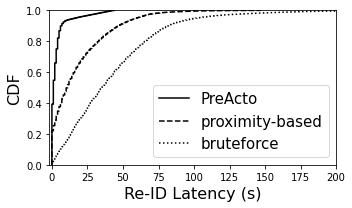

In [48]:
log_path = '/home/tung/carlasim/data_archived/extracted_tracks_300_30_bb_15_60/scenerio_sim_log'
fig_path = '/home/tung/carlasim/trajectory_analysis_archived/figs'

methods = ['proposed', 'knei', 'bruteforce']
names = ['PreActo', 'proximity-based', 'bruteforce']
linestyles = ['-', '--', 'dotted']

lag = {}

fig = plt.figure(figsize = (5, 3))
linestyles = ['-', '--', 'dotted']
for idx, method in enumerate(methods):
    log_file = '{}_reid_latency.csv'.format(method)
    log_file_path = os.path.join(log_path, log_file)
    lag[method] = pd.read_csv(log_file_path)
    sns.ecdfplot(data = lag[method], x = 'latency', color = 'black', linestyle = linestyles[idx])

plt.legend(names, prop = {'size': 15})
plt.xlim(-2, 200)
plt.xlabel('Re-ID Latency (s)', size = 16)
plt.ylabel('CDF', size = 16)
plt.tight_layout()
plt.savefig(os.path.join(fig_path, 'latency_cdf.pdf'), dpi = 1500)